## 0. Basic knowledge of feature engineering

In [1]:
## Question 1: A good feature should be discriminative and representative.

In [2]:
## Question 2: Why is image feature extraction hard? 

# Ans: Individual pixel color values are NOT an adequate feature to determine correspondences
#     Because pixels are not characteristic of an image (for example, a dog's image can have red pixels, 
#     while a horse's can also have red pixels)
#     So we need to consider 'blocks of pixels', for example, taking the
#     surroounding pixels into consideration.
#     Only in  this way, can we reduce the effect of rotation, flipping, 
#     deformation, and ect.

In [3]:
## Question 3: As we have learned in class, both 'Maximum entropy' and 'Smallest margin' can be used to
##             measure uncertainty in active learning. Please explain which one is better for active learning and why?
##             Note that: this is an open question and you can answer in Chinese as well.

## My answer:

# In my opinion, the 'Maximum ewntropy' is better.
# We can approach this problem from 2 aspects:
#     on the one hand, 'maximun entropy' is more comprehensive, it take the data of all samples into consideration
#     on the other hand, active learning is improve model's performance with lables as few as possible 
#     So sonsidering these 2 factors, I think maximum entropy is better because it can reflect the data set comprehensively, and this can better
#     select the ambiguous instances, then presenting them for extra labeling

## 1. Text feature engineering

In [4]:
## Given a corpus as:
corpus = ['The goal of this lecture is to explain text processing.',
          'The bag of words model is one such approach.',
          'Text processing via bag of words.',
          'Data science includes text processing']

In [5]:
# !pip3 install sklearn
## Question 4: Use BOW to extract features of the given corpus. 
## 
## Your code here
## 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 15)	1
  (0, 4)	1
  (0, 9)	1
  (0, 16)	1
  (0, 7)	1
  (0, 6)	1
  (0, 17)	1
  (0, 3)	1
  (0, 14)	1
  (0, 11)	1
  (1, 15)	1
  (1, 9)	1
  (1, 6)	1
  (1, 1)	1
  (1, 19)	1
  (1, 8)	1
  (1, 10)	1
  (1, 13)	1
  (1, 0)	1
  (2, 9)	1
  (2, 14)	1
  (2, 11)	1
  (2, 1)	1
  (2, 19)	1
  (2, 18)	1
  (3, 14)	1
  (3, 11)	1
  (3, 2)	1
  (3, 12)	1
  (3, 5)	1


In [6]:
## Question 5: Use TFIDF to extract features of the given corpus. 
## 
## Your code here
## 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Y = vectorizer.fit_transform(corpus)
print(Y)

  (0, 11)	0.23360869991447142
  (0, 14)	0.23360869991447142
  (0, 3)	0.3659931706709981
  (0, 17)	0.3659931706709981
  (0, 6)	0.2885532196006135
  (0, 7)	0.3659931706709981
  (0, 16)	0.3659931706709981
  (0, 9)	0.23360869991447142
  (0, 4)	0.3659931706709981
  (0, 15)	0.2885532196006135
  (1, 0)	0.38086516913285073
  (1, 13)	0.38086516913285073
  (1, 10)	0.38086516913285073
  (1, 8)	0.38086516913285073
  (1, 19)	0.30027847400958324
  (1, 1)	0.30027847400958324
  (1, 6)	0.30027847400958324
  (1, 9)	0.24310130388692774
  (1, 15)	0.30027847400958324
  (2, 18)	0.5371830325370646
  (2, 19)	0.4235212730041086
  (2, 1)	0.4235212730041086
  (2, 11)	0.3428769712206024
  (2, 14)	0.3428769712206024
  (2, 9)	0.3428769712206024
  (3, 5)	0.5119917161748856
  (3, 12)	0.5119917161748856
  (3, 2)	0.5119917161748856
  (3, 11)	0.3267976803045626
  (3, 14)	0.3267976803045626


In [7]:
## Question 6: Use Word2Vec to extract features of the given corpus. 
# !pip3 install gensim
from gensim.test.utils import common_texts
from gensim.sklearn_api import W2VTransformer
# Create a model to represent each word by a 10 dimensional vector
model = W2VTransformer(size=10, min_count=1, seed=1)
## The model trained on the common_texts
# What is the vector representation of the word ‘graph’? 
common_texts
wordvecs = model.fit(common_texts).transform(['graph']) 
wordvecs
## 
## You should extract the vector representation of the word 'text' by the model trained on the given corpus.
## Note that: the formulation of the given corpus is different from that of common_texts, 
## you should transform the given corpus to the the formulation of common_texts first.
## 
## Your code here
## In next cell


array([[ 0.04576098,  0.04882504,  0.00825521, -0.00122285, -0.00679342,
         0.00365627,  0.00475215, -0.03505001, -0.004961  ,  0.01315367]],
      dtype=float32)

In [8]:
## 
## Your code here
## 
words_list = []
for sentence in corpus:
    words_list.append(sentence.split())
# print(words_list)
model = W2VTransformer(size=10, min_count=1, seed=1)
wordvecs_common_text = model.fit(words_list).transform(['text']) 
print(wordvecs_common_text)

[[ 0.0494656   0.03413517  0.00032518 -0.00489395 -0.02507001 -0.00917046
  -0.03160857  0.03087081  0.01838998  0.02286113]]


## 2. Time series feature engineering

In [9]:
## Question 7: Use decompose (model='additive') to extract time series features of the given time series
from random import randrange
import math
from pandas import Series
series = Series([20*math.sin(i/18*math.pi) + i + randrange(10) for i in range(1,360)])


In [10]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
## 
## Your code here
## 
# ?seasonal_decompose
# print(series)
result = seasonal_decompose(series, model='multiplicative', freq=36)
result.plot()


<Figure size 640x480 with 4 Axes>

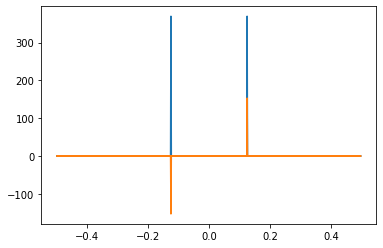

In [11]:
## Question 8: Use Discrete Fourier Transform (DFT) to extract time series features of the given time series
import matplotlib.pyplot as plt
import numpy as np
series = Series([np.cos(2*math.pi*1/8*n+math.pi/8) for n in range(800)])
## 
## Your code here
## 
sp = np.fft.fft(series)
freq = np.fft.fftfreq(series.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

## 3. Image feature engineering

In [12]:
## Use SIFT in opencv-python to extract image features on the given image 'morning.jpg'
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16
## Note that: NOT all versions of opencv-contrib-python includes SIFT in cv2.xfeatures2d, 
## but this specified version does
import cv2
import numpy as np
name = 'dog.jpg'
img = cv2.imread(name)
gray_img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("The shape of the image: ", gray_img.shape)
siftDetector= cv2.xfeatures2d.SIFT_create()
## Note that: SIFT was re-organized in opencv thus you should import it like this.

## finds the keypoint in the images
kp = siftDetector.detect(gray_img,None)
## draws the small circles on the locations of keypoints
cv2.drawKeypoints(gray_img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoint_example' + name, img) ## Save Example
## directly find keypoints and descriptors in a single step 
kp, des = siftDetector.detectAndCompute(gray_img,None)
print("The shape of feature description: ", des.shape)

The shape of the image:  (485, 729)
The shape of feature description:  (418, 128)


In [13]:
## Question 9: Please rescale the given image 'dog.jpg' at a random ratio between 0.3 with 1.5.
##          Note that: the width and height of the given image should be rescaled at a different ratio.
##          Repeat this operation five times, then you will get five new images with different scale.
##
##          Please extract the SIFT features of these images respectively and use 'imwrite' to save them.
##          An example of saving keypoints on the input image is shown as follow:
##          cv2.drawKeypoints(gray_img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
##          cv2.imwrite('sift_keypoint_' + name, img)
##
## 
## Your code here
## 
import cv2
import numpy as np
import random
name = 'dog.jpg'

def rescale():
    for i in range(6):
        img = cv2.imread(name)
        rescaled_img = cv2.resize(img, (0,0), fx=random.uniform(0.3, 1.5), fy=random.uniform(0.3, 1.5))
        gray = cv2.cvtColor(rescaled_img,cv2.COLOR_BGR2GRAY)
        siftDetector= cv2.xfeatures2d.SIFT_create()
        kp = siftDetector.detect(gray, None)
        cv2.drawKeypoints(gray, kp, rescaled_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        cv2.imwrite(str(i) + name, rescaled_img) ## Save Example
#         kp, des = siftDetector.detectAndCompute(gray,None)
#         print("The shape of feature description: ", des.shape)
    return

rescale()
print("Rescaling Done!")


#         feat_img = rescaled_img
#         siftDetector= cv2.xfeatures2d.SIFT_create()
#         kp = siftDetector.detect(rescaled_img, None)
#         cv2.drawKeypoints(rescaled_img, kp, feat_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#         cv2.imwrite('feat_rescaled' + str(i) + name, feat_img)

# siftDetector= cv2.xfeatures2d.SIFT_create()
# ## Note that: SIFT was re-organized in opencv thus you should import it like this.

# ## finds the keypoint in the images
# kp = siftDetector.detect(rotated_dog,None)
# ## draws the small circles on the locations of keypoints
# cv2.drawKeypoints(rotated_dog,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imwrite('rotated_feature' + name, img) ## Save Example


Rescaling Done!


In [14]:
## Question 10: Please rotate the given image 'dog.jpg' 30, 60, 90, 120, 150, 180 degrees clockwise,
##              then you will get six new images with different rotation angle.
##              Please extract the SIFT features of these images respectively and use 'imwrite' to save them.
##              An example of saving keypoints on the input image is shown as follow:
##              cv2.drawKeypoints(gray_img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
##              cv2.imwrite('sift_keypoint_' + name, img)

In [15]:
# import cv2
# cv2.warpAffine(image, M, (w, h))
# # 

# siftDetector= cv2.xfeatures2d.SIFT_create()
# ## Note that: SIFT was re-organized in opencv thus you should import it like this.

# ## finds the keypoint in the images
# kp = siftDetector.detect(rotated_dog,None)
# ## draws the small circles on the locations of keypoints
# cv2.drawKeypoints(rotated_dog,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imwrite('rotated_feature' + name, img) ## Save Example

In [16]:
## 
import cv2
import numpy as np
import random
name = 'dog.jpg'
def rotate(image, angle, center=None, scale=1.0):
    # Get the size
    (h, w) = image.shape[:2]
    # set the rotation center at the center of the image
    if center is None:
        center = (w / 2, h / 2)
    # carry out 
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
 
    # return the rotated fig
    return rotated

degrees = [30, 60, 90, 120, 150, 180]
def rescale():
    for deg in degrees:
        img = cv2.imread(name)
        rescaled_img = rotate(img, deg)
        gray = cv2.cvtColor(rescaled_img,cv2.COLOR_BGR2GRAY)
        siftDetector= cv2.xfeatures2d.SIFT_create()
        kp = siftDetector.detect(gray, None)
        cv2.drawKeypoints(gray, kp, rescaled_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        cv2.imwrite(str(deg) + "rot" + name, rescaled_img) ## Save Example
        kp, des = siftDetector.detectAndCompute(img,None)
    return

rescale()
print("Rescaling Done!")


Rescaling Done!
